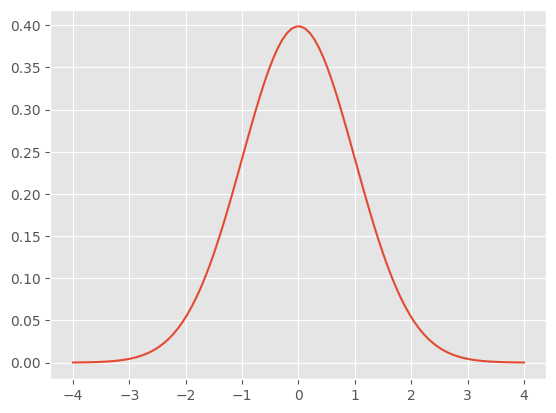

In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

X = norm(loc=0, scale=1)

x = np.linspace(-4, 4, 100)
y = X.pdf(x)

plt.plot(x, y)
plt.show()

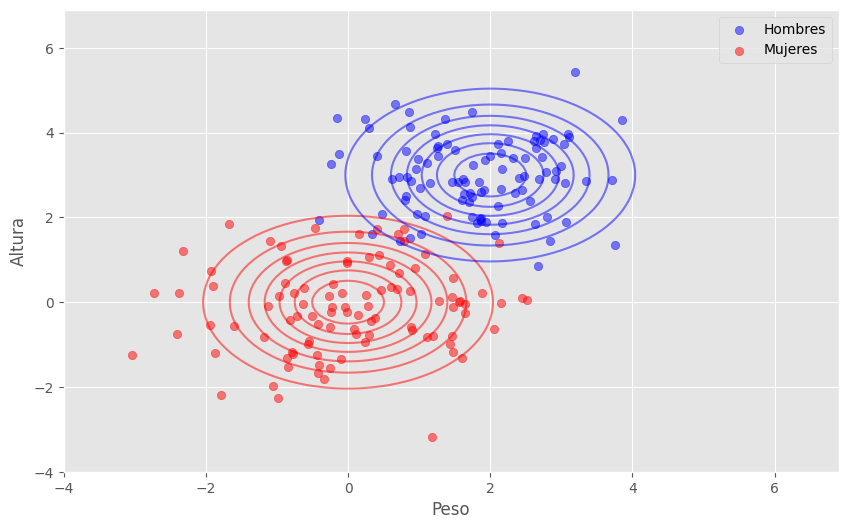

In [3]:
from scipy.stats import multivariate_normal

hombres = multivariate_normal(mean=[0, 0], cov=[[1, 0], [0, 1]])

mujeres = multivariate_normal(mean=[2, 3], cov=[[1, 0], [0, 1]])

samples_hombres = hombres.rvs(100)
samples_mujeres = mujeres.rvs(100)

sample_data = np.concatenate((samples_hombres, samples_mujeres), axis=0)

y = np.concatenate((np.ones(100), np.zeros(100)), axis=0)

X, Y = np.mgrid[-4:7:0.1, -4:7:0.1]

data = np.c_[X.ravel(), Y.ravel()]

Z_hombres = hombres.pdf(data)
Z_mujeres = mujeres.pdf(data)

plt.figure(figsize=(10,6))


plt.scatter(samples_mujeres[:, 0], samples_mujeres[:, 1], label='Mujeres', color='blue',  alpha=0.5)
plt.scatter(samples_hombres[:, 0], samples_hombres[:, 1], label='Hombres', color='red',  alpha=0.5)
plt.contour(X, Y, Z_hombres.reshape(X.shape), colors='red', alpha=0.5)
plt.contour(X, Y, Z_mujeres.reshape(X.shape), colors='Blue', alpha=0.5)
plt.xlabel('Peso')
plt.ylabel('Altura')
plt.legend(['Hombres', 'Mujeres'])
plt.show()

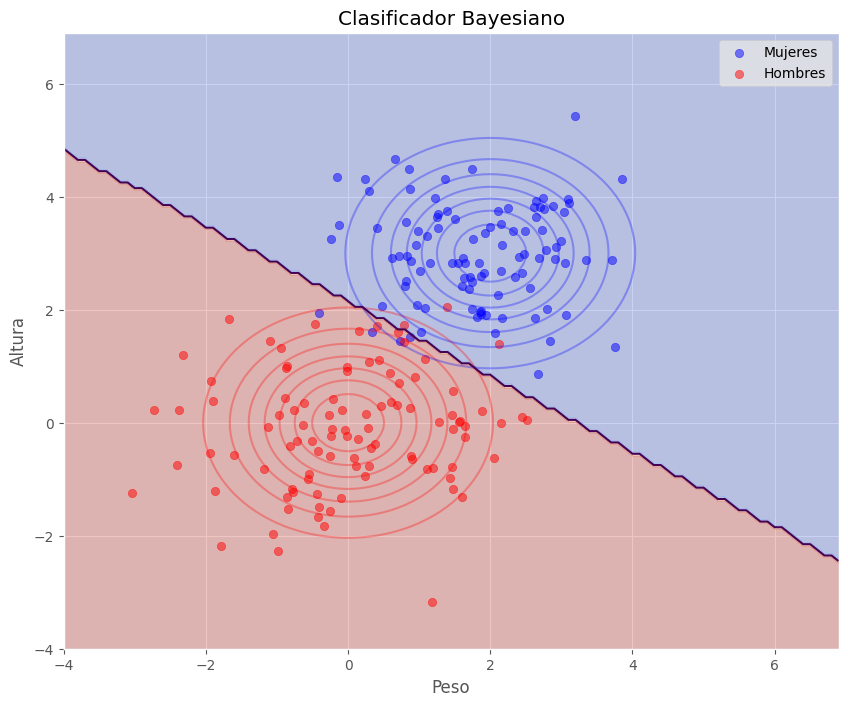

In [4]:
p_hombre = hombres.pdf(data) * 0.5 / (hombres.pdf(data) * 0.5 + mujeres.pdf(data) * 0.5)

p_mujer = mujeres.pdf(data) * 0.5 / (hombres.pdf(data) * 0.5 + mujeres.pdf(data) * 0.5)


predict = np.where(p_hombre > p_mujer, 1, 0)


plt.figure(figsize=(10,8))

plt.contour(X, Y, Z_hombres.reshape(X.shape), colors='red', alpha=0.3)
plt.contour(X, Y, Z_mujeres.reshape(X.shape), colors='Blue', alpha=0.3)
plt.contourf(X, Y,predict.reshape(X.shape), cmap='coolwarm', alpha=0.3)
plt.contour(X, Y,predict.reshape(X.shape), levels=[0.5])
plt.scatter(samples_mujeres[:, 0], samples_mujeres[:, 1], label='Mujeres', color='blue',  alpha=0.5)
plt.scatter(samples_hombres[:, 0], samples_hombres[:, 1], label='Hombres', color='red',  alpha=0.5)

plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Clasificador Bayesiano')
plt.legend()
plt.show()


plt.show()

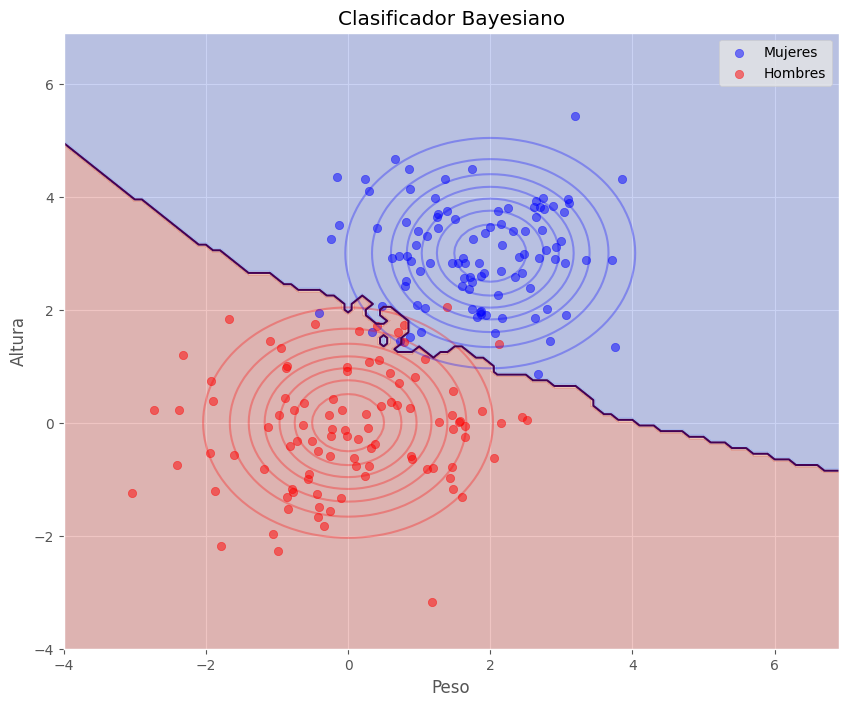

In [5]:
from sklearn.neighbors import KNeighborsClassifier

predictKnn = KNeighborsClassifier(n_neighbors=3).fit(sample_data, y).predict(data)

plt.figure(figsize=(10,8))

plt.contour(X, Y, Z_hombres.reshape(X.shape), colors='red', alpha=0.3)
plt.contour(X, Y, Z_mujeres.reshape(X.shape), colors='Blue', alpha=0.3)
plt.contourf(X, Y,predictKnn.reshape(X.shape), cmap='coolwarm', alpha=0.3)
plt.contour(X, Y,predictKnn.reshape(X.shape), levels=[0.5])
plt.scatter(samples_mujeres[:, 0], samples_mujeres[:, 1], label='Mujeres', color='blue',  alpha=0.5)
plt.scatter(samples_hombres[:, 0], samples_hombres[:, 1], label='Hombres', color='red',  alpha=0.5)

plt.xlabel('Peso')
plt.ylabel('Altura')
plt.title('Clasificador Bayesiano')
plt.legend()
plt.show()


plt.show()

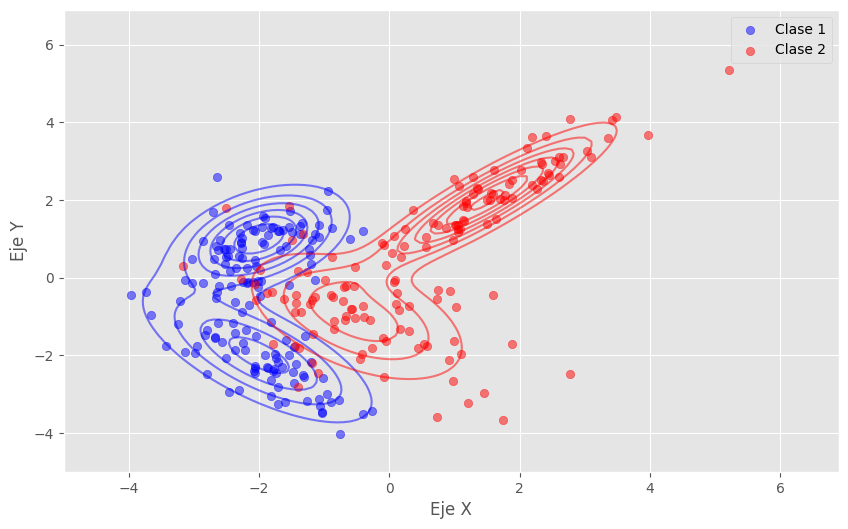

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the individual multivariate normal distributions
dist1 = multivariate_normal(mean=[-2, 1], cov=[[0.5, 0.2], [0.2, 0.5]])
dist2 = multivariate_normal(mean=[-2, -2], cov=[[1, -0.7], [-0.7, 1]])
dist3 = multivariate_normal(mean=[-0.5, -1], cov=[[1, -0.5], [-0.5, 1]])
dist4 = multivariate_normal(mean=[1.5, 2], cov=[[1, 0.9], [0.9, 1]])

# Generar muestras para cada distribución
samples_dist1 = dist1.rvs(75)
samples_dist2 = dist2.rvs(75)
samples_dist3 = dist3.rvs(75)
samples_dist4 = dist4.rvs(75)

# Combinar las muestras para Clase 1 y Clase 2
samples_clase1 = np.concatenate((samples_dist1, samples_dist2), axis=0)
samples_clase2 = np.concatenate((samples_dist3, samples_dist4), axis=0)

# Crear las etiquetas correspondientes
y_clase1 = np.ones(samples_clase1.shape[0])
y_clase2 = np.zeros(samples_clase2.shape[0])

# Combinar los datos de ambas clases
sample_data = np.concatenate((samples_clase1, samples_clase2), axis=0)
y = np.concatenate((y_clase1, y_clase2), axis=0)

# Crear la malla para el gráfico de contornos
X, Y = np.mgrid[-5:7:0.1, -5:7:0.1]
data = np.c_[X.ravel(), Y.ravel()]

# Evaluar las distribuciones de las clases en la malla
Z_clase1 = 0.5 * dist1.pdf(data) + 0.5 * dist2.pdf(data)
Z_clase2 = 0.5 * dist3.pdf(data) + 0.5 * dist4.pdf(data)

# Visualización
plt.figure(figsize=(10,6))

plt.scatter(samples_clase1[:, 0], samples_clase1[:, 1], label='Clase 1', color='blue', alpha=0.5)
plt.scatter(samples_clase2[:, 0], samples_clase2[:, 1], label='Clase 2', color='red', alpha=0.5)
plt.contour(X, Y, Z_clase1.reshape(X.shape), colors='blue', alpha=0.5)
plt.contour(X, Y, Z_clase2.reshape(X.shape), colors='red', alpha=0.5)
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend(['Clase 1', 'Clase 2'])
plt.show()

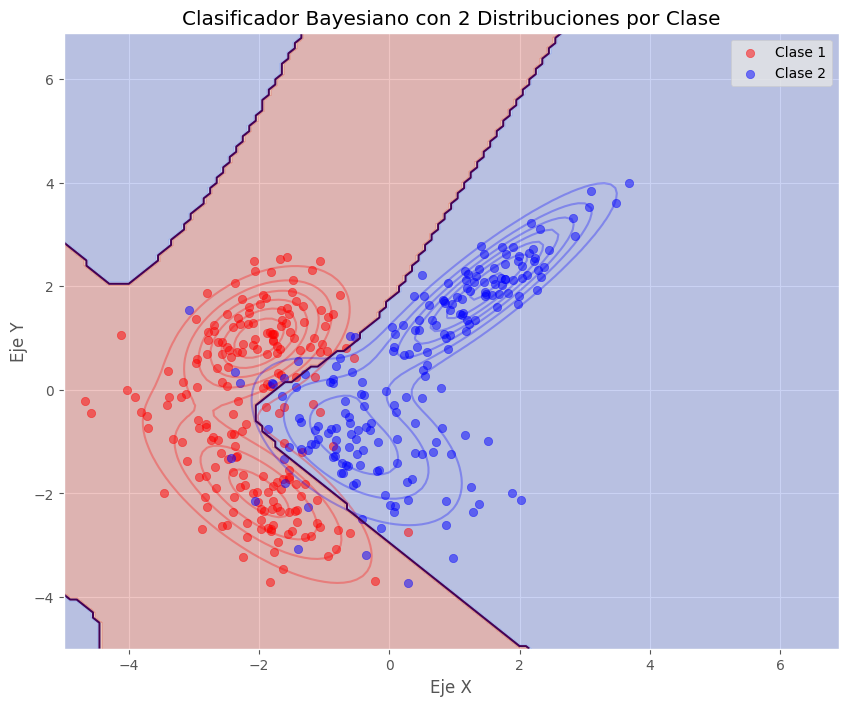

In [25]:
# Calcular las probabilidades para cada clase usando un clasificador bayesiano
p_clase1 = Z_clase1 * 0.5 / (Z_clase1 * 0.5 + Z_clase2 * 0.5)
p_clase2 = Z_clase2 * 0.5 / (Z_clase1 * 0.5 + Z_clase2 * 0.5)

# Predecir la clase (Clase 1 o Clase 2) en función de las probabilidades
predict = np.where(p_clase1 > p_clase2, 1, 0)

# Combinar las muestras de las clases
samples_clase1 = np.concatenate((samples_dist1, samples_dist2), axis=0)
samples_clase2 = np.concatenate((samples_dist3, samples_dist4), axis=0)

# Visualización del clasificador y las muestras
plt.figure(figsize=(10,8))

# Dibujar los contornos de las distribuciones de las clases
plt.contour(X, Y, Z_clase1.reshape(X.shape), colors='red', alpha=0.3)
plt.contour(X, Y, Z_clase2.reshape(X.shape), colors='blue', alpha=0.3)

# Mostrar la predicción del clasificador bayesiano
plt.contourf(X, Y, predict.reshape(X.shape), cmap='coolwarm', alpha=0.3)
plt.contour(X, Y, predict.reshape(X.shape), levels=[0.5])

# Dibujar las muestras de ambas clases
plt.scatter(samples_clase1[:, 0], samples_clase1[:, 1], label='Clase 1', color='red', alpha=0.5)
plt.scatter(samples_clase2[:, 0], samples_clase2[:, 1], label='Clase 2', color='blue', alpha=0.5)

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Clasificador Bayesiano con 2 Distribuciones por Clase')
plt.legend()
plt.show()

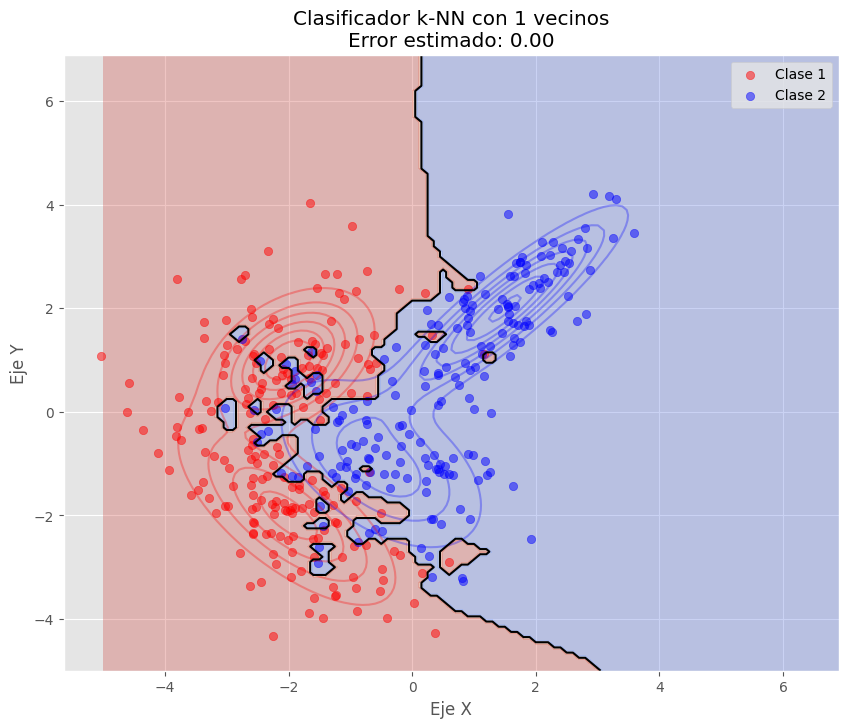

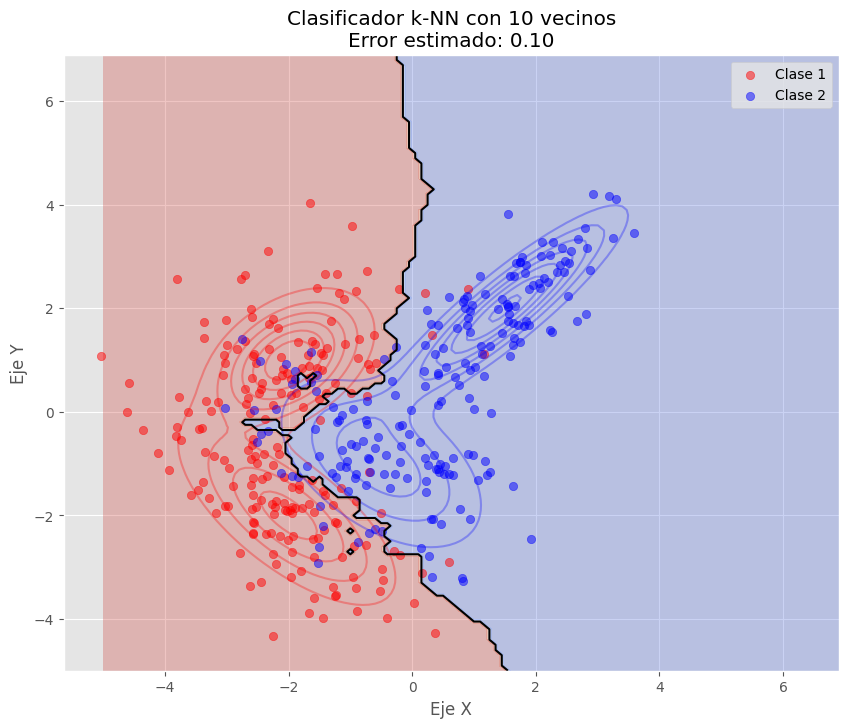

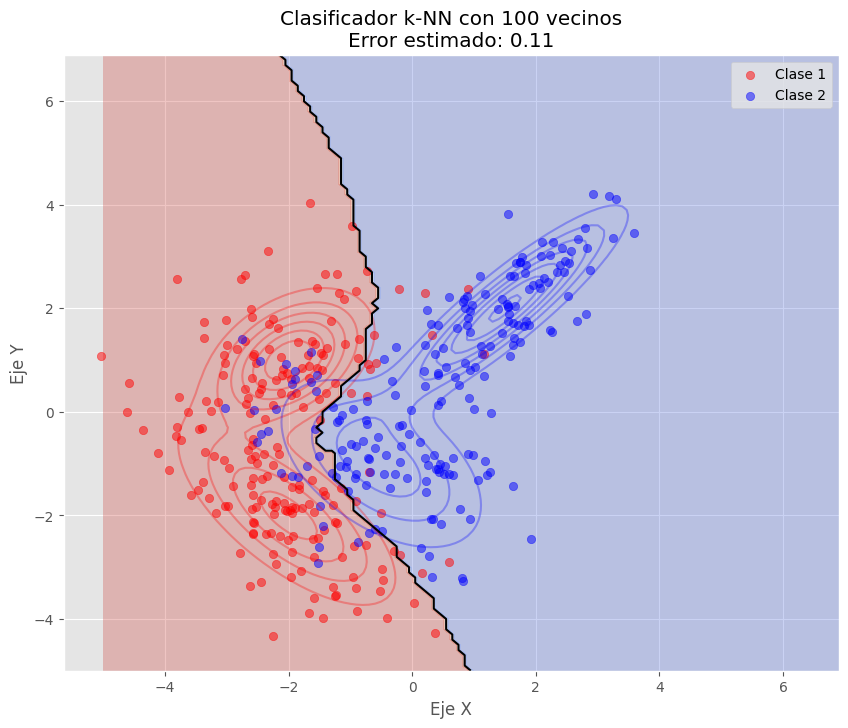

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear etiquetas
y_clase1 = np.ones(samples_clase1.shape[0])
y_clase2 = np.zeros(samples_clase2.shape[0])

# Unir los datos
X_train = np.concatenate((samples_clase1, samples_clase2), axis=0)
y_train = np.concatenate((y_clase1, y_clase2), axis=0)

# Crear malla de predicción
X, Y = np.mgrid[-5:7:0.1, -5:7:0.1]
grid_points = np.c_[X.ravel(), Y.ravel()]

# Función para dibujar la visualización de k-NN
def plot_knn(k, X_train, y_train, grid_points, X, Y):
    # Definir el clasificador KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predecir las clases para cada punto de la malla
    predictions = knn.predict(grid_points).reshape(X.shape)

    # Predecir las clases para las muestras de entrenamiento
    y_pred_train = knn.predict(X_train)

    # Calcular el error de predicción en el conjunto de entrenamiento
    train_error = 1 - accuracy_score(y_train, y_pred_train)

    # Visualización
    plt.figure(figsize=(10,8))

    # Dibujar los contornos de las distribuciones de las clases
    plt.contour(X, Y, Z_clase1.reshape(X.shape), colors='red', alpha=0.3)
    plt.contour(X, Y, Z_clase2.reshape(X.shape), colors='blue', alpha=0.3)


    # Contornos de la predicción del KNN
    plt.contourf(X, Y, predictions, cmap='coolwarm', alpha=0.3)
    plt.contour(X, Y, predictions, levels=[0.5], colors='black')

    # Dibujar las muestras de las clases
    plt.scatter(samples_clase1[:, 0], samples_clase1[:, 1], label='Clase 1', color='red', alpha=0.5)
    plt.scatter(samples_clase2[:, 0], samples_clase2[:, 1], label='Clase 2', color='blue', alpha=0.5)

    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title(f'Clasificador k-NN con {k} vecinos\nError estimado: {train_error:.2f}')
    plt.legend()
    plt.show()

# Ejecutar k-NN para diferentes valores de k
for k in [1, 10, 100]:
    plot_knn(k, X_train, y_train, grid_points, X, Y)

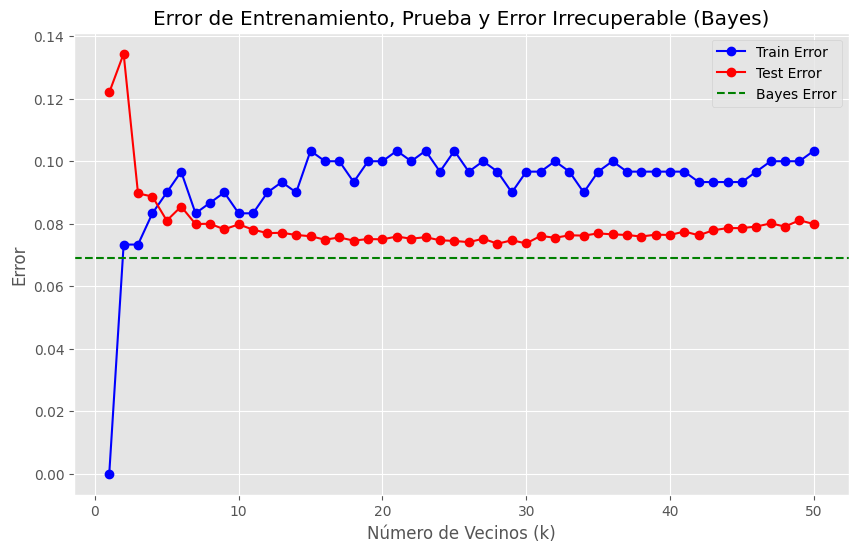

In [34]:
# Generar muestras originales para entrenar
dist1 = multivariate_normal(mean=[-2, 1], cov=[[0.5, 0.2], [0.2, 0.5]])
dist2 = multivariate_normal(mean=[-2, -2], cov=[[1, -0.7], [-0.7, 1]])
dist3 = multivariate_normal(mean=[-0.5, -1], cov=[[1, -0.5], [-0.5, 1]])
dist4 = multivariate_normal(mean=[1.5, 2], cov=[[1, 0.9], [0.9, 1]])

# Generar muestras para cada distribución
samples_dist1 = dist1.rvs(75)
samples_dist2 = dist2.rvs(75)
samples_dist3 = dist3.rvs(75)
samples_dist4 = dist4.rvs(75)

# Combinar las muestras para Clase 1 y Clase 2
samples_clase1 = np.concatenate((samples_dist1, samples_dist2), axis=0)
samples_clase2 = np.concatenate((samples_dist3, samples_dist4), axis=0)

# Crear las etiquetas correspondientes
y_clase1 = np.ones(samples_clase1.shape[0])
y_clase2 = np.zeros(samples_clase2.shape[0])

# Combinar los datos de ambas clases
X_train = np.concatenate((samples_clase1, samples_clase2), axis=0)
y_train = np.concatenate((y_clase1, y_clase2), axis=0)

# Generar una nueva muestra aleatoria para los datos de prueba
X_test = np.concatenate([dist1.rvs(2500), dist2.rvs(2500), dist3.rvs(2500), dist4.rvs(2500)], axis=0)
y_test = np.concatenate([np.ones(2500), np.ones(2500), np.zeros(2500), np.zeros(2500)])

# Error irrecuperable con clasificador Bayesiano (usando la probabilidad verdadera)
Z_clase1 = 0.5 * dist1.pdf(X_test) + 0.5 * dist2.pdf(X_test)
Z_clase2 = 0.5 * dist3.pdf(X_test) + 0.5 * dist4.pdf(X_test)
p_clase1 = Z_clase1 / (Z_clase1 + Z_clase2)
bayes_error = np.mean(np.where(p_clase1 > 0.5, 1, 0) != y_test)

# Listas para almacenar los errores
train_errors = []
test_errors = []
k_values = range(1, 51)

# Entrenar 50 modelos k-NN y calcular errores
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Predicciones para entrenamiento
    y_train_pred = knn.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_pred)

    # Predicciones para prueba
    y_test_pred = knn.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_pred)

    # Guardar errores
    train_errors.append(train_error)
    test_errors.append(test_error)

# Visualizar el error de entrenamiento, prueba y el error irrecuperable
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_errors, label='Train Error', color='blue', marker='o')
plt.plot(k_values, test_errors, label='Test Error', color='red', marker='o')
plt.axhline(y=bayes_error, color='green', linestyle='--', label='Bayes Error')

plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Error')
plt.title('Error de Entrenamiento, Prueba y Error Irrecuperable (Bayes)')
plt.legend()
plt.grid(True)
plt.show()